In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import geopandas as gpd

%matplotlib inline


from matplotlib import rcParams

rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

/Users/ducciopiovani/.virtualenvs/duccio/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ducciopiovani/.virtualenvs/duccio/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Calibration Figures

In [ ]:
# Reading the data #

Idbl = pd.read_csv('sorensen_index_data/double_sorensen_index.csv',header=None)
Isgl = pd.read_csv('sorensen_index_data/single_sorensen_index.csv',header=None)
Iext = pd.read_csv('sorensen_index_data/extended_radiation_sorensen_index.csv',header=None)

In [ ]:
fig, (ax1,ax2)  = plt.subplots(ncols = 2, figsize=(10,5))

ax1.plot(Idbl[0],Idbl[1],label='double')
ax1.plot(Isgl[0],Isgl[1],label='single')
ax1.set_title('Gravity Models',fontsize=15)
ax1.set_ylabel("Sorensen's Index",fontsize=15)
ax1.set_xlabel(r"$\beta$",fontsize=25)
ax2.set_xlabel(r"$\alpha$",fontsize=25)
ax2.set_title('Extended Radiation',fontsize=15)
ax2.plot(Iext[0],Iext[1])
ax1.legend(fontsize=15)
plt.tight_layout()

# Accessibility Figures 

In [3]:
Aold = pd.read_csv('output_data/accessibility_old.txt',sep='\t')
Abrt = pd.read_csv('output_data/accessibility_brt.txt',sep='\t')
df = pd.read_csv('input_data/population_employment.txt',sep='\t')

In [4]:
Aold.head(), Abrt.head()

(       Adbl     Asngl      Arad      Aext       A2
 0  0.021076  0.025075  0.053403  0.032085  135.323
 1  0.049664  0.049126  0.079088  0.052059  188.812
 2  0.041827  0.041751  0.061619  0.043937  164.332
 3  0.023477  0.026136  0.045783  0.030239  126.254
 4  0.038927  0.040107  0.066935  0.043259  143.247,
        Adbl     Asngl      Arad      Aext       A2
 0  0.037682  0.041441  0.081065  0.048061  198.756
 1  0.070842  0.070802  0.116630  0.077072  279.969
 2  0.057635  0.058792  0.090566  0.064064  234.235
 3  0.037195  0.036883  0.069185  0.041732  168.980
 4  0.038662  0.041235  0.084549  0.050173  165.702)

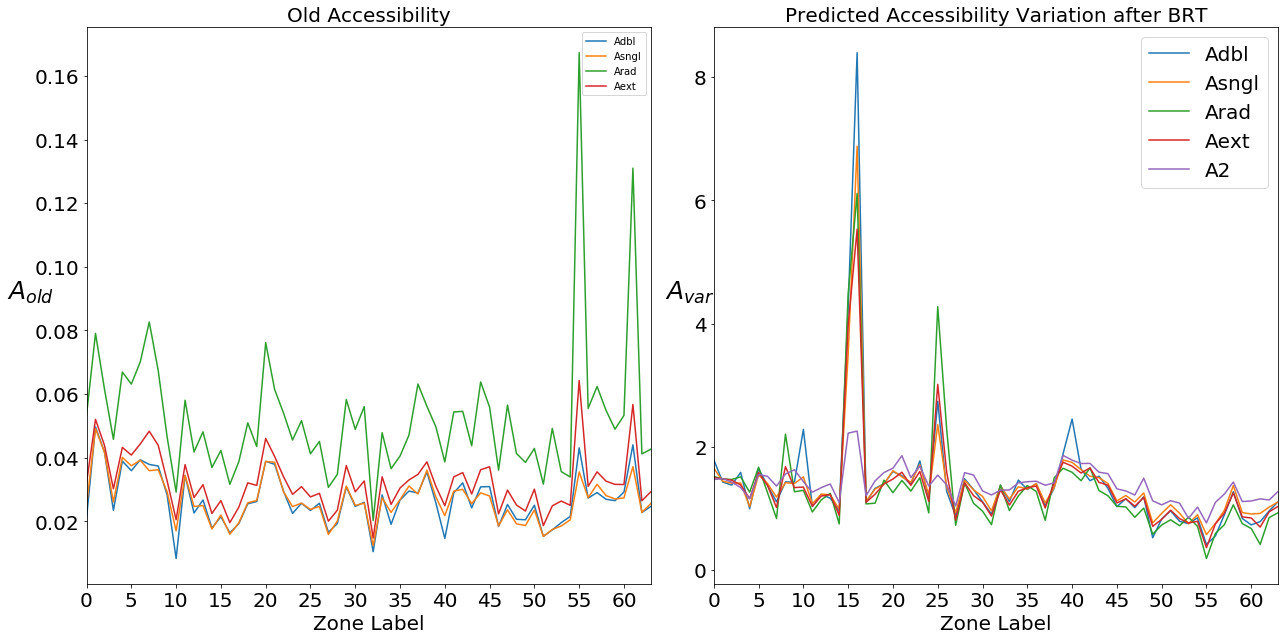

In [5]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize=(18,9))
Aold[['Adbl','Asngl','Arad','Aext']].plot(ax=ax1)
ax1.set_xlabel('Zone Label', fontsize=20)
ax2.set_xlabel('Zone Label', fontsize=20)
ax1.set_title("Old Accessibility", fontsize=20)
ax1.set_ylabel(r'${A_{old}}$',fontsize=25,rotation=0)
ax1.set_xticks(np.arange(0,70,5))
ax2.set_xticks(np.arange(0,70,5))
ax1.set_xlim(0,63)
ax2.set_xlim(0,63)
ax2.set_ylabel(r'$A_{var}$',fontsize=25,rotation=0)
ax2.set_title('Predicted Accessibility Variation after BRT', fontsize=20)
(Abrt / Aold).plot(ax=ax2)
ax2.legend(fontsize=20)
plt.tight_layout()

#### Accessibility Variation 

In [6]:
from scipy.stats.stats import linregress
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return r_value**2


R2_bus = pd.DataFrame()
for c1 in Aold.columns[:-1]:
    l = []
    for c2 in Aold.columns[:-1]:
        l.append(rsquared(Aold[c1],Aold[c2]))
    R2_bus[c1] = l  
R2_bus.index = Aold.columns[:-1]
R2_bus.columns = Aold.columns[:-1]
print(R2_bus)


R2_brt = pd.DataFrame()
for c1 in Abrt.columns[:-1]:
    l = []
    for c2 in Abrt.columns[:-1]:
        l.append(rsquared(Abrt[c1],Abrt[c2]))
    R2_brt[c1] = l  
    
R2_brt.index = Abrt.columns[:-1]
R2_brt.columns = Abrt.columns[:-1]

dA = Abrt / Aold
R2_dA = pd.DataFrame()
for c1 in dA.columns:
    l = []
    for c2 in dA.columns:
        
        l.append(rsquared(dA[c1],dA[c2]))
    R2_dA[c1] = l  
R2_dA.index = dA.columns
print(R2_dA)

R2_dA.columns = Abrt.columns
R2_dA.index = Abrt.columns


           Adbl     Asngl      Arad      Aext
Adbl   1.000000  0.923425  0.595030  0.893119
Asngl  0.923425  1.000000  0.455296  0.813760
Arad   0.595030  0.455296  1.000000  0.831569
Aext   0.893119  0.813760  0.831569  1.000000
           Adbl     Asngl      Arad      Aext        A2
Adbl   1.000000  0.984690  0.829124  0.921282  0.535929
Asngl  0.984690  1.000000  0.835640  0.932443  0.548806
Arad   0.829124  0.835640  1.000000  0.959897  0.529960
Aext   0.921282  0.932443  0.959897  1.000000  0.632820
A2     0.535929  0.548806  0.529960  0.632820  1.000000


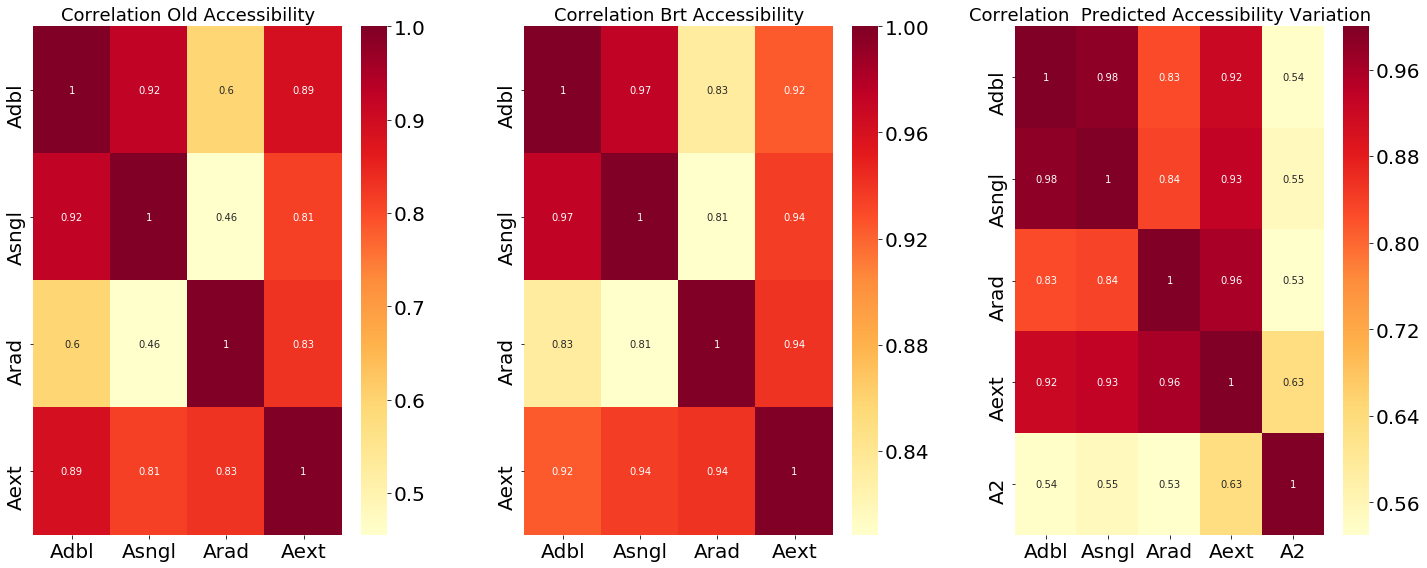

In [7]:
fig, (ax1,ax2, ax3)  = plt.subplots(ncols = 3, figsize=(20,8))
ax1.set_title("Correlation Old Accessibility",fontsize= 18)
ax2.set_title("Correlation Brt Accessibility",fontsize= 18)
ax3.set_title("Correlation  Predicted Accessibility Variation",fontsize= 18)  
sns.heatmap(R2_bus, cmap='YlOrRd',annot=True, ax=ax1 )
sns.heatmap(R2_brt, cmap='YlOrRd',annot=True, ax=ax2 )
sns.heatmap(R2_dA,  cmap='YlOrRd',annot=True, ax=ax3 )
plt.tight_layout()

In [11]:
T = gpd.read_file("teresina_shape_file/Shape_file.shp")
T['Adouble']= dA['Adbl']
T['Aext']= dA['Aext']
T['Asng']= dA['Asngl']
T['Arad']= dA['Arad']

vec = T.geometry.apply(lambda x: x.centroid.coords[0][0]).values

0 2.5


/Users/ducciopiovani/.virtualenvs/duccio/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


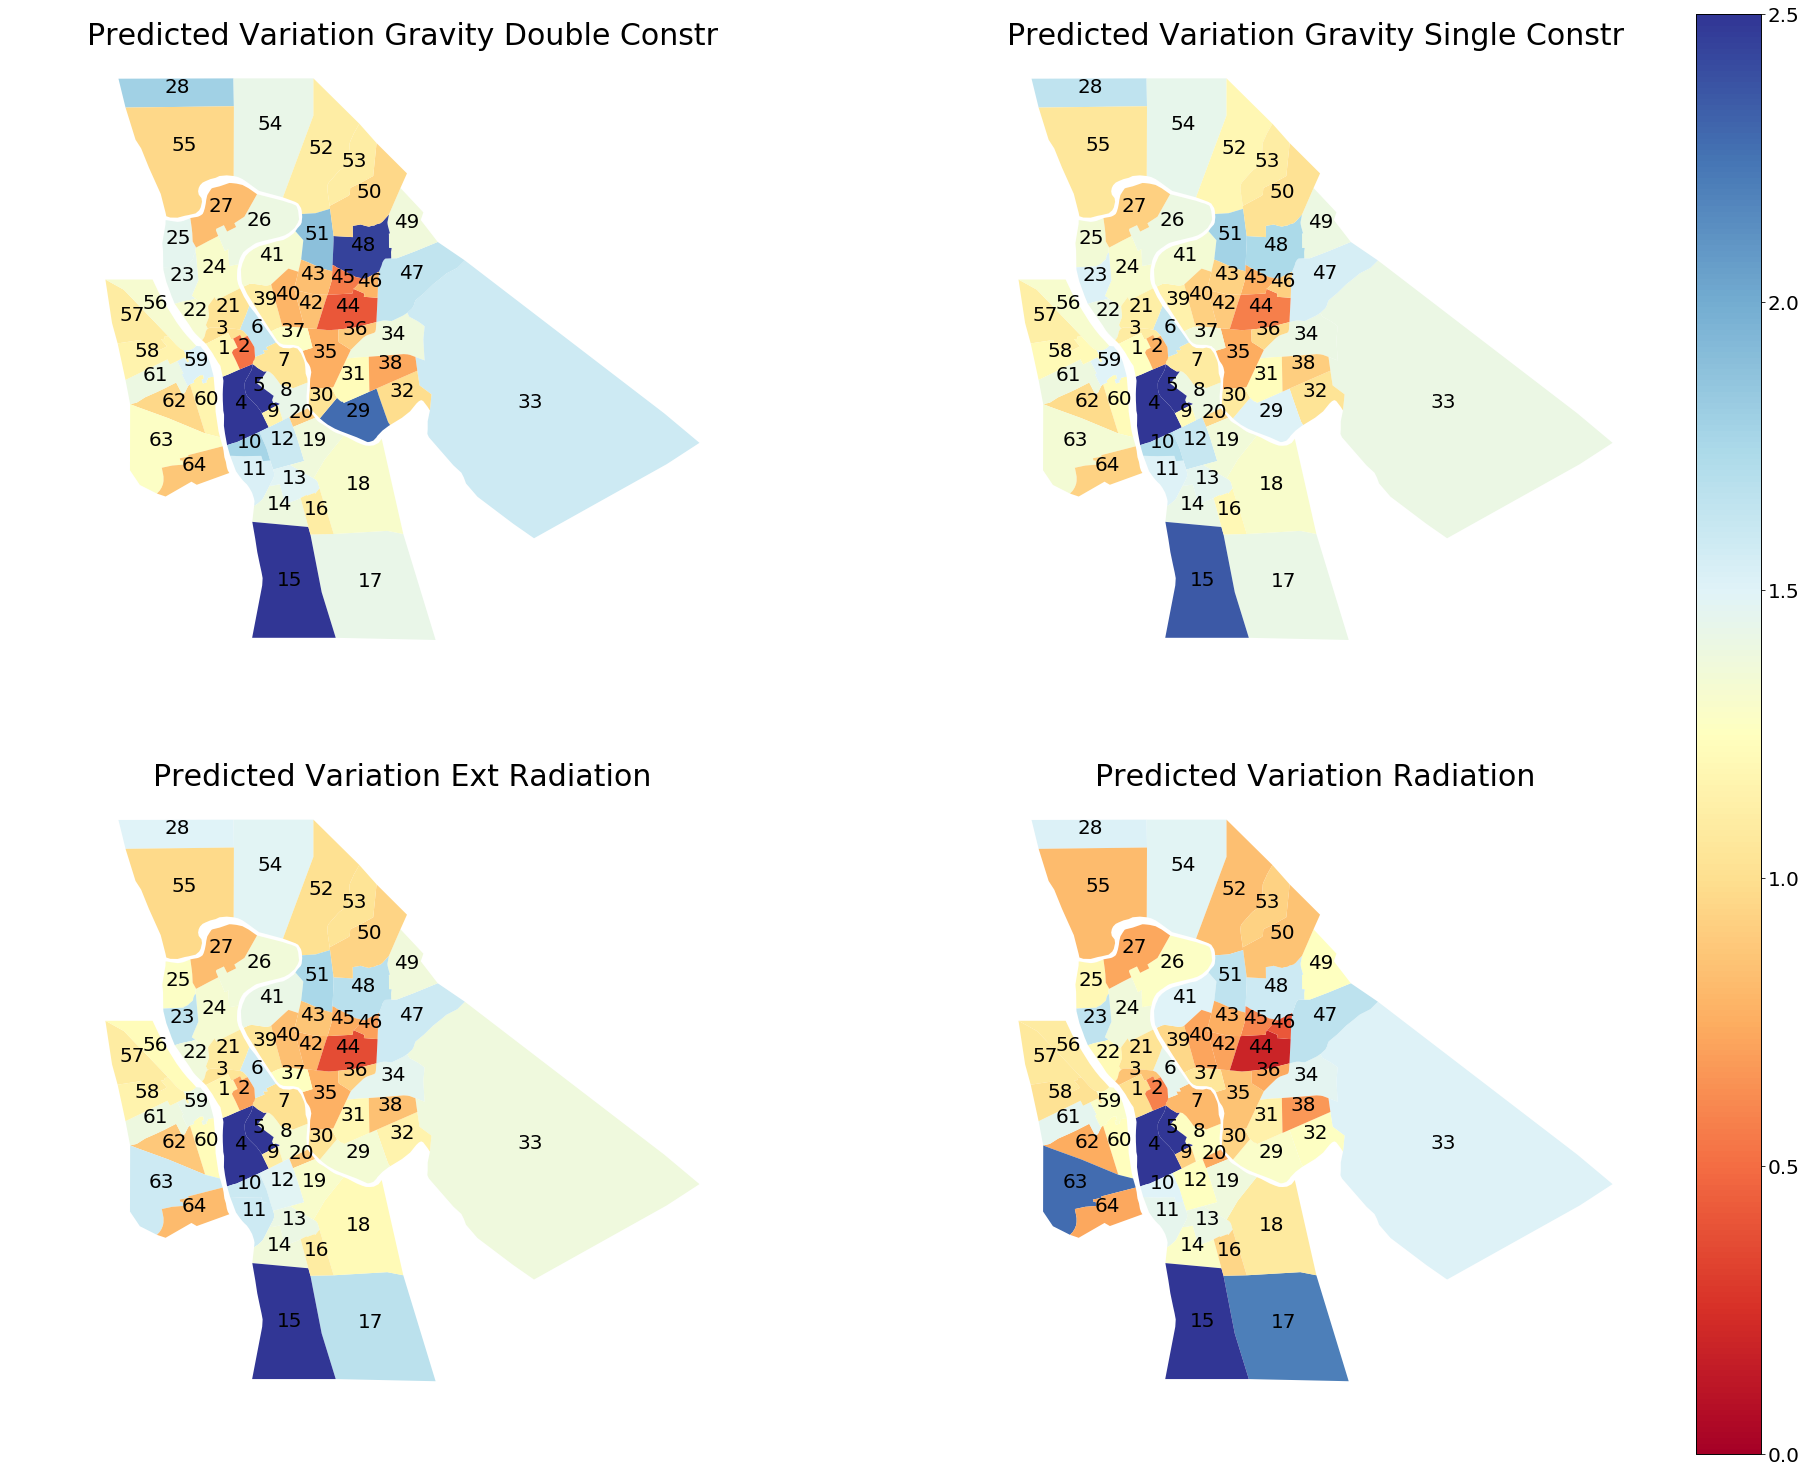

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(30,25))

vmin , vmax = 0, 2.5
 
print(vmin, vmax)    
T.plot(column='Adouble', colormap='RdYlBu', vmin=vmin, vmax=vmax,ax=ax[0][0])
T.apply(lambda x: ax[0][0].annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center',fontsize=20),axis=1);
fig = ax[0][0].get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
ax[0][0].axis('off')
fig.colorbar(sm, cax=cax)
ax[0][0].set_title('Predicted Variation Gravity Double Constr', fontsize = 30)
#ax[0][0].annotate('(b)', xy = (-42.8768, -4.980422505926358), fontsize = 35)
#ax[0][0].annotate(s=x.Name, xy=x.geometry.centroid.coords[0]



T.plot(column='Asng', colormap='RdYlBu', vmin=vmin, vmax=vmax,ax=ax[0][1])
T.apply(lambda x: ax[0][1].annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center',fontsize=20),axis=1);
fig = ax[0][1].get_figure()
# fake up the array of the scalar mappable. Urgh...
sm._A = []
ax[0][1].axis('off')
fig.colorbar(sm, cax=cax)
ax[0][1].set_title('Predicted Variation Gravity Single Constr', fontsize = 30)


T.plot(column='Aext', colormap='RdYlBu', vmin=vmin, vmax=vmax,ax=ax[1][0])
T.apply(lambda x: ax[1][0].annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center',fontsize=20),axis=1);
fig = ax[1][0].get_figure()
#sm._A = []
ax[1][0].axis('off')
ax[1][0].set_title('Predicted Variation Ext Radiation',fontsize = 30)


T.plot(column='Arad', colormap='RdYlBu', vmin=vmin, vmax=vmax,ax=ax[1][1])
T.apply(lambda x: ax[1][1].annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center',fontsize=20),axis=1);
fig = ax[1][1].get_figure()
#sm._A = []
ax[1][1].axis('off')
ax[1][1].set_title('Predicted Variation Radiation',fontsize = 30)
plt.savefig('map_accessibility.eps')



In [19]:
Delta = 0
Io = dr[dr ==0].index
In = dr[dr < -Delta].index
Ip = dr[dr > Delta].index

In [21]:
Io.shape, In.shape, Ip.shape

((9,), (24,), (31,))

/Users/ducciopiovani/.virtualenvs/duccio/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(-19,0.02,'(a)')

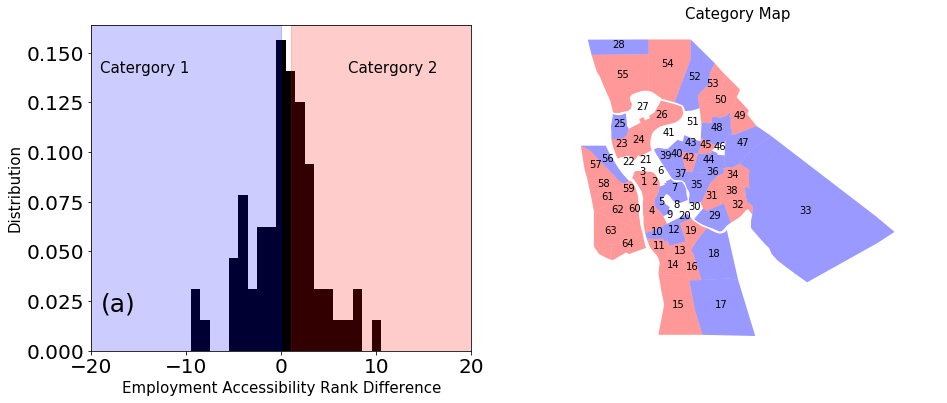

In [24]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122)
Delta = 0
Io = dr[dr ==0].index
In = dr[dr < -Delta].index
Ip = dr[dr > Delta].index

T['cat'] = np.zeros(T.shape[0])
T.loc[Ip,'cat'] = 1
T.loc[In,'cat'] = -1

ax.set_title('Category Map',fontsize=15)
T.plot(column = 'cat',ax=ax,cmap='bwr',alpha=0.4)
T.apply(lambda x: ax.annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center',fontsize=10),axis=1);
ax.set_rasterized(True)
ax.axis('off')



ax = fig.add_subplot(121)
ax.hist(dr,bins = np.arange(-21,21),normed=True,color='black',align='left')
ax.axvspan(1, 24, alpha=0.2, color='red')
ax.axvspan(-0, -20, alpha=0.2, color='blue')
ax.set_xlim(-20,20)
ax.set_xlabel('Employment Accessibility Rank Difference',fontsize=15)
ax.set_ylabel('Distribution',fontsize=15)
ax.annotate('Catergory 1',xy = (-19,0.14),fontsize=15)

ax.annotate('Catergory 2',xy = (7,0.14),fontsize=15)
ax.set_rasterized(True)
ax.annotate('(a)',xy = (-19,0.02),fontsize=25)


In [25]:
E = pd.read_csv('output_data/fraction_of_employmnet.txt',sep='\t',header=None)
E = E.T.dropna(0) # I have to translate the matrix becasue I want zones to be orgranized in columns #

/Users/ducciopiovani/.virtualenvs/duccio/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


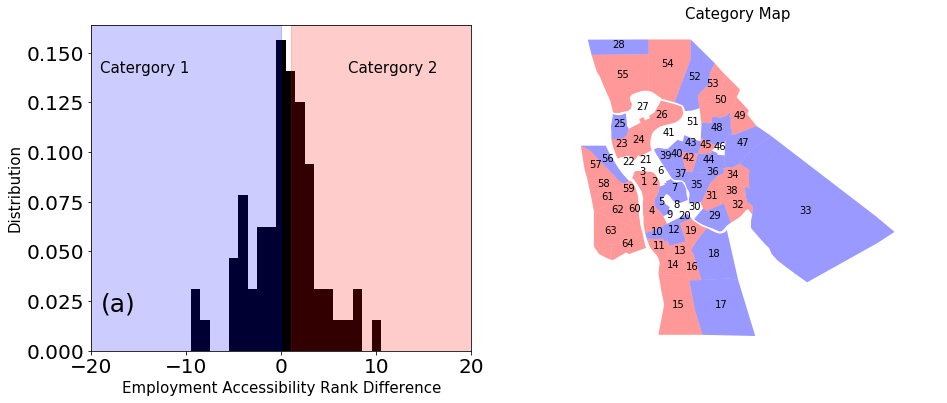

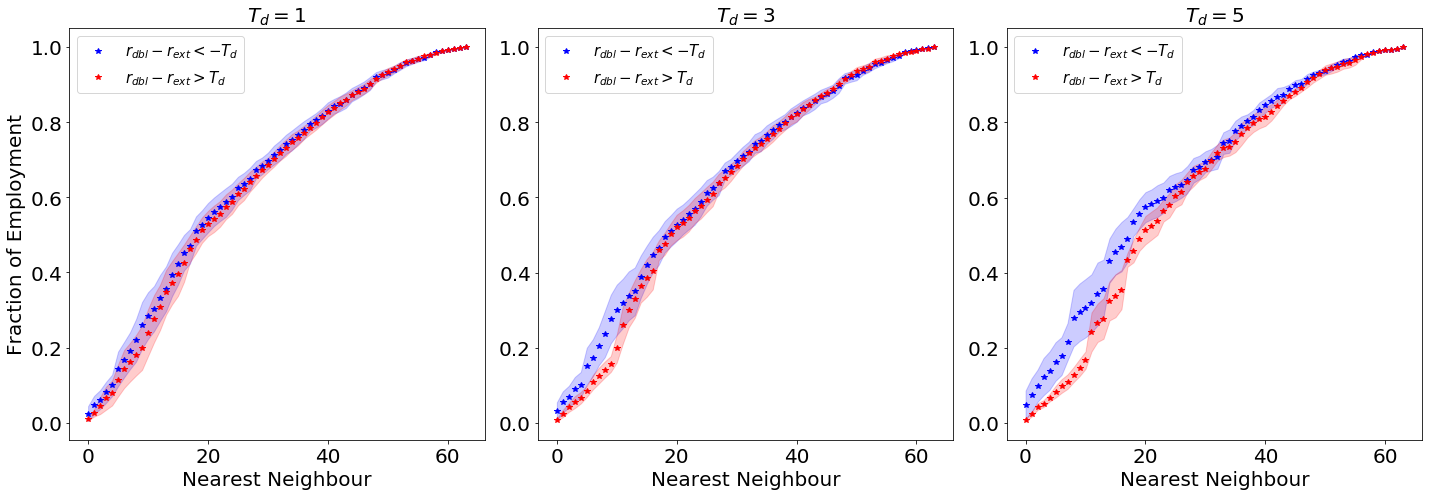

In [32]:
rank = Aold.rank(ascending=True)
dr = rank['Adbl'] - rank['Aext']


fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122)
Delta = 0
Io = dr[dr ==0].index
In = dr[dr < -Delta].index
Ip = dr[dr > Delta].index

T['cat'] = np.zeros(T.shape[0])
T.loc[Ip,'cat'] = 1
T.loc[In,'cat'] = -1

ax.set_title('Category Map',fontsize=15)
T.plot(column = 'cat',ax=ax,cmap='bwr',alpha=0.4)
T.apply(lambda x: ax.annotate(s=x.Name, xy=x.geometry.centroid.coords[0], ha='center',fontsize=10),axis=1);
ax.set_rasterized(True)
ax.axis('off')



ax = fig.add_subplot(121)
ax.hist(dr,bins = np.arange(-21,21),normed=True,color='black',align='left')
ax.axvspan(1, 24, alpha=0.2, color='red')
ax.axvspan(-0, -20, alpha=0.2, color='blue')
ax.set_xlim(-20,20)
ax.set_xlabel('Employment Accessibility Rank Difference',fontsize=15)
ax.set_ylabel('Distribution',fontsize=15)
ax.annotate('Catergory 1',xy = (-19,0.14),fontsize=15)

ax.annotate('Catergory 2',xy = (7,0.14),fontsize=15)
ax.set_rasterized(True)
ax.annotate('(a)',xy = (-19,0.02),fontsize=25)


fig, ax  = plt.subplots(ncols=3,figsize=(20, 7))
for n in range(3):
     
    Delta = n*2 +1
    Io = dr[(dr >= -Delta)&(dr <= Delta)].index
    In = dr[dr < -Delta].index
    Ip = dr[dr > Delta].index

    ax[n].set_title(r'$T_d = $'+str(Delta),fontsize=20)
    yerr = E[In].std(axis=1)
    yerr2 = E[Ip].std(axis=1)
    E[In].mean(axis=1).plot(ax = ax[n],color='b',marker='*',linewidth=0,label=r'$r_{dbl} - r_{ext} < -T_d$')
    E[Ip].mean(axis=1).plot(ax = ax[n],color='r',marker='*',linewidth=0,label=r'$r_{dbl} - r_{ext} > T_d$')
    
    ax[n].fill_between(np.arange(0,64),E[In].mean(axis=1)+yerr/2 , E[In].mean(axis=1)-yerr/2 ,color='b',alpha=0.2)
    ax[n].fill_between(np.arange(0,64),E[Ip].mean(axis=1)+yerr2/2, E[Ip].mean(axis=1)-yerr2/2,color='r',alpha=0.2)
    ax[n].legend(fontsize=15)
    ax[n].set_xlabel('Nearest Neighbour',fontsize=20)
    ax[n].set_rasterized(True)
    
    if n == 0:
        ax[n].set_ylabel('Fraction of Employment',fontsize=20)
        
plt.tight_layout()